In [1]:
# -*- coding: utf-8 -*- #

# Write libraries here #########################################
import matplotlib.patches as pat
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
# from astroquery.gama import GAMA
from jupyterthemes import jtplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, cluster, preprocessing, mixture
from time import time
from tqdm import tnrange, tqdm_notebook
%matplotlib inline

import seaborn as sns; sns.set(style="ticks", color_codes=True)
# %matplotlib notebook
################################################################

# Showing 500 columns and rows #################################
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
################################################################

# NOT CHANGE (The PATH for directory) ##########################
CURRENT_DIR_NAME = os.path.dirname(os.path.abspath(__name__))
PATH_DATA = os.path.join(CURRENT_DIR_NAME, '../data/')
PATH_HIST = os.path.join(CURRENT_DIR_NAME, '../histogram/')
PATH_PLOT = os.path.join(CURRENT_DIR_NAME, '../plots/')
PATH_IMG = os.path.join(CURRENT_DIR_NAME, '../images/')
PATH_HTML = os.path.join(CURRENT_DIR_NAME, '../html/')
PATH_TEX = os.path.join(CURRENT_DIR_NAME, '../for_tex/')
################################################################

#When you make plots, jtplot is better.
jtplot.style(theme='grade3', context='notebook', fscale=3, spines=True, gridlines='--', ticks=False, grid=False)

In [2]:
completed_data = pd.read_pickle(PATH_DATA + 'GAMADataForManifold.pickle')
completed_data = completed_data.sample(frac=0.1).reset_index(drop=True)

DATA_GAMA_FLUX = completed_data.copy()

N_COMP = 8

In [3]:
display(completed_data.describe())

,RA,DEC,FUV_flux,FUV_fluxerr,NUV_flux,NUV_fluxerr,u_flux,u_fluxerr,g_flux,g_fluxerr,r_flux,r_fluxerr,i_flux,i_fluxerr,z_flux,z_fluxerr,X_flux,X_fluxerr,Y_flux,Y_fluxerr,J_flux,J_fluxerr,H_flux,H_fluxerr,K_flux,K_fluxerr,W1_flux,W1_fluxerr,W2_flux,W2_fluxerr,W3_flux,W3_fluxerr,W4_flux,W4_fluxerr,P100_flux,P100_fluxerr,P160_flux,P160_fluxerr,S250_flux,S250_fluxerr,S350_flux,S350_fluxerr,S500_flux,S500_fluxerr,Z_TONRY,NQ,KCORR_FUV,KCORR_NUV,KCORR_U,KCORR_G,KCORR_R,KCORR_I,KCORR_Z,KCORR_Y,KCORR_J,KCORR_H,KCORR_K,PCOEFF_R_1,PCOEFF_R_2,PCOEFF_R_3,PCOEFF_R_4,PCOEFF_R_5,COEFFS_1,COEFFS_2,COEFFS_3,COEFFS_4,COEFFS_5,CHI2,MASS,INTSFH,METS,B300,B1000,FUV_flux_kcorrected,NUV_flux_kcorrected,H_flux_kcorrected,I_flux_kcorrected,K_flux_kcorrected,G_flux_kcorrected,Z_flux_kcorrected,Y_flux_kcorrected,J_flux_kcorrected,R_flux_kcorrected,U_flux_kcorrected,R-K,NUV-R
count,7377.000000,7377.000000,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7377.000000,7.377000e+03,7377.000000,7.377000e+03,7377.000000,7.377000e+03,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7.377000e+03,7377.000000,7.377000e+03,7377.000000,7.377000e+03,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7377.000000,7.377000e+03,7.377000e+03,7377.000000,7.377000e+03,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000
mean,189.260764,0.396496,9.599554e-06,1.343820e-06,1.723104e-05,6.294513e-06,3.698481e-05,5.545494e-06,0.000115,6.919214e-06,0.000225,9.487913e-06,0.000321,1.290361e-05,0.000393,0.000026,-3.926810,-3.927186,0.000479,0.000037,0.000564,0.000035,0.000688,0.000038,0.000712,0.000039,0.000375,0.000071,2.576529e-04,0.000065,6.425030e-04,0.000144,1.227684e-03,0.000912,-132.145758,-132.152887,-132.408748,-132.421594,-146.234726,-146.248004,-146.243532,-146.247856,-146.248655,-146.246626,0.198958,4.126881,0.257940,0.124348,0.432498,0.456459,0.202768,0.061377,0.070781,0.098756,-0.019397,0.004304,-0.329251,-0.001022,1.741036,-6.422287,12.962167,-5.051432,3.852972e-06,1.116158e-09,7.200201e-07,9.056800e-06,1.644860e-07,2.458749,2.797546e+10,5.045168e+10,0.029650,1.931747e-02,0.266113,-17.237891,-18.112889,-22.199849,-21.455468,-21.971110,-20.618427,-21.674477,-21.909975,-21.963721,-21.207134,-19.303912,0.763976,3.094245
std,34.050111,1.354901,4.172698e-05,2.838117e-06,5.658773e-05,4.760706e-05,1.198240e-04,2.276833e-05,0.000360,2.587707e-05,0.000614,3.373926e-05,0.000836,4.252451e-05,0.001004,0.000083,62.517109,62.517086,0.001171,0.000207,0.001348,0.000170,0.001631,0.000143,0.001442,0.000134,0.000775,0.000222,4.790886e-04,0.000095,1.613812e-03,0.000476,3.480231e-03,0.000917,338.513911,338.511121,338.810705,338.805673,353.186406,353.180904,353.182756,353.180965,353.180634,353.181474,0.102183,0.377520,0.527217,0.249814,0.370192,0.340936,0.147741,0.144268,0.107162,0.122619,0.091179,0.067606,0.126676,0.003259,0.682020,6.725603,18.622632,17.816378,1.672283e-05,4.598311e-09,2.079632e-06,2.574639e-05,5.539336e-07,21.693239,5.063474e+10,8.852195e+10,0.007695,4.388721e-02,0.187899,1.641966,1.458186,1.449584,1.323011,1.465539,1.196530,1.359794,1.394213,1.412501,1.258565,1.205656,0.355927,1.306209
min,129.001400,-2.961346,4.128410e-10,1.332550e-08,2.420700e-09,2.335730e-07,3.187250e-08,3.027710e-07,0.000001,1.740430e-07,0.000006,2.551480e-07,0.000004,3.505190e-07,0.000011,0.000001,-999.000000,-999.000000,0.000014,0.000002,0.000012,0.000001,0.000004,0.000003,0.000026,0.00

In [4]:
# Select columns for classification and manifold learning
X = completed_data[['Z_TONRY', 'FUV_flux_kcorrected', 'NUV_flux_kcorrected',
                    'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
                    'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

# # Select columns for classification and manifold learning
# X_ORIG = completed_data[['FUV_flux_kcorrected', 'NUV_flux_kcorrected',
#                     'U_flux_kcorrected', 'G_flux_kcorrected', 'R_flux_kcorrected', 'I_flux_kcorrected', 'Z_flux_kcorrected',
#                     'Y_flux_kcorrected', 'J_flux_kcorrected', 'H_flux_kcorrected', 'K_flux_kcorrected']]

In [5]:
# X['FUV_flux_kcorrected'] = 10**(-0.4*completed_data['FUV_flux_kcorrected']) 
# X['NUV_flux_kcorrected'] = 10**(-0.4*completed_data['NUV_flux_kcorrected'])
# X['U_flux_kcorrected'] = 10**(-0.4*completed_data['U_flux_kcorrected'])
# X['G_flux_kcorrected'] = 10**(-0.4*completed_data['G_flux_kcorrected'])
# X['R_flux_kcorrected'] = 10**(-0.4*completed_data['R_flux_kcorrected'])
# X['I_flux_kcorrected'] = 10**(-0.4*completed_data['I_flux_kcorrected'])
# X['Z_flux_kcorrected'] = 10**(-0.4*completed_data['Z_flux_kcorrected'])
# X['Y_flux_kcorrected'] = 10**(-0.4*completed_data['Y_flux_kcorrected'])
# X['J_flux_kcorrected'] = 10**(-0.4*completed_data['J_flux_kcorrected'])
# X['H_flux_kcorrected'] = 10**(-0.4*completed_data['H_flux_kcorrected'])
# X['K_flux_kcorrected'] = 10**(-0.4*completed_data['K_flux_kcorrected'])

X['FUV_flux_kcorrected'] = 10**(-0.4*completed_data['FUV_flux_kcorrected'] - 8) 
X['NUV_flux_kcorrected'] = 10**(-0.4*completed_data['NUV_flux_kcorrected'] - 8)
X['U_flux_kcorrected'] = 10**(-0.4*completed_data['U_flux_kcorrected'] - 8)
X['G_flux_kcorrected'] = 10**(-0.4*completed_data['G_flux_kcorrected'] - 8)
X['R_flux_kcorrected'] = 10**(-0.4*completed_data['R_flux_kcorrected'] - 8)
X['I_flux_kcorrected'] = 10**(-0.4*completed_data['I_flux_kcorrected'] - 8)
X['Z_flux_kcorrected'] = 10**(-0.4*completed_data['Z_flux_kcorrected'] - 8)
X['Y_flux_kcorrected'] = 10**(-0.4*completed_data['Y_flux_kcorrected'] - 8)
X['J_flux_kcorrected'] = 10**(-0.4*completed_data['J_flux_kcorrected'] - 8)
X['H_flux_kcorrected'] = 10**(-0.4*completed_data['H_flux_kcorrected'] - 8)
X['K_flux_kcorrected'] = 10**(-0.4*completed_data['K_flux_kcorrected'] - 8)

X.describe()

# X = X.sample(frac=0.).reset_index(drop=True)

/home/suchetha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/suchetha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/suchetha/.local/lib/python3.5/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Z_TONRY,FUV_flux_kcorrected,NUV_flux_kcorrected,U_flux_kcorrected,G_flux_kcorrected,R_flux_kcorrected,I_flux_kcorrected,Z_flux_kcorrected,Y_flux_kcorrected,J_flux_kcorrected,H_flux_kcorrected,K_flux_kcorrected
count,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000,7377.000000
mean,0.198958,0.206935,0.370290,0.890197,2.858607,5.120526,6.776880,8.447294,10.719084,11.398157,14.426143,11.833262
std,0.102183,0.459291,0.565928,1.015464,2.791350,5.192410,7.314733,9.113740,11.789903,12.571418,15.710239,13.014819
min,0.007505,0.000114,0.000142,0.010081,0.014576,0.018790,0.022650,0.019778,0.020592,0.020239,0.021298,0.021566
25%,0.125607,0.031421,0.076826,0.272168,0.941597,1.599014,1.912575,2.314379,2.827733,2.910371,3.588732,2.873696
50%,0.182220,0.092725,0.200938,0.589375,2.028046,3.570811,4.559659,5.630226,7.128337,7.538006,9.564876,7.784179
75%,0.264534,0.219293,0.452743,1.132823,3.880352,6.973901,9.144915,11.428858,14.566150,15.652120,20.001513,16.414236
max,0.880804,11.507675,12.181341,13.082681,24.802112,62.874002,80.103579,124.156195,202.322757,187.351199,196.062213,141.049708


In [6]:
# x_diff = []

# orig_data = np.array(X_ORIG)#[:100,:]
# i=0
# j=1

# p = 0
# while i<11:
#     while j <11:
#         diff = orig_data[:,i] - orig_data[:,j]
#         x_diff.append(diff)
# #         print(i,j)
#         p += 1
        
#         j+=1
#     i += 1
#     j = i+1
    
# # print(f"p={p}")
# x_diff = np.array(x_diff)
# X_DIFF = pd.DataFrame(x_diff.T)
# # X_DIFF = X_DIFF.sample(frac=1).reset_index(drop=True)
# X_DIFF.describe()

In [7]:
# RobustScaler uses [0.25, 0.75] samples
# sc=preprocessing.RobustScaler(quantile_range=(25, 75))#StandardScaler()
sc=preprocessing.StandardScaler(with_mean=True, with_std=True)
# sc=preprocessing.RobustScaler()
sc.fit(X)
X=sc.transform(X)

# x=X[:,0]
# y=X[:,1]

# print(X_norm)

X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03,7.377000e+03
mean,-1.386989e-16,6.260713e-18,-1.184719e-16,9.631866e-18,-7.272059e-17,5.730960e-17,1.565178e-17,-1.439964e-16,-8.379723e-17,1.324382e-17,4.334340e-17,8.451962e-17
std,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00,1.000068e+00
min,-1.873755e+00,-4.503361e-01,-6.540999e-01,-8.667715e-01,-1.018942e+00,-9.826039e-01,-9.234359e-01,-9.247672e-01,-9.074898e-01,-9.051237e-01,-9.169702e-01,-9.076189e-01
25%,-7.178880e-01,-3.821686e-01,-5.185886e-01,-6.086581e-01,-6.868147e-01,-6.782498e-01,-6.650461e-01,-6.729762e-01,-6.693767e-01,-6.752111e-01,-6.898779e-01,-6.884593e-01
50%,-1.638139e-01,-2.486846e-01,-2.992658e-01,-2.962606e-01,-2.975681e-01,-2.984780e-01,-3.031376e-01,-3.091222e-01,-3.045818e-01,-3.070785e-01,-3.094540e-01,-3.111344e-01
75%,6.417971e-01,2.690815e-02,1.457055e-01,2.389475e-01,3.660645e-01,3.569635e-01,3.237570e-01,3.271726e-01,3.263239e-01,3.384067e-01,3.549118e-01,3.520053e-01
max,6.673261e+00,2.460642e+01,2.087165e+01,1.200762e+01,7.861786e+00,1.112343e+01,1.002520e+01,1.269695e+01,1.625261e+01,1.399723e+01,1.156242e+01,9.929082e+00


In [8]:
# from sklearn import (manifold, datasets, decomposition, ensemble,
#                      discriminant_analysis, random_projection, neighbors)

# n_samples, n_features = X.shape
# n_neighbors = 30

# t0 = time()
# X_iso = manifold.Isomap(n_neighbors, n_components=4, n_jobs=-1).fit_transform(X)
# # X_pca = decomposition.TruncatedSVD(n_components=11).fit_transform(X)

# print("(time %.2fs)" %(time() - t0))
# pd.DataFrame(X_iso).describe()

In [ ]:
tsne = manifold.TSNE(n_components=2,perplexity = 100, init='pca')
t0 = time()
X_tsne = tsne.fit_transform(X)
print("(time %.2fs)" %(time() - t0))
pd.DataFrame(X_tsne).describe()

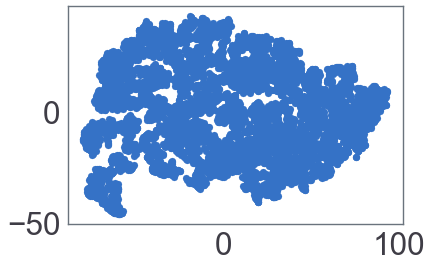

In [19]:
plt.scatter(X_tsne[:,0], X_tsne[:,1])

In [20]:
# plt.scatter(X_tsne[:,1], X_tsne[:,2])

In [21]:
X_prep = X_tsne

# #Execute the K-means
# km=cluster.KMeans(n_clusters=N_COMP)
# z_km=km.fit(X_DIFF)

# Execute the VBGMM
vbgm = mixture.BayesianGaussianMixture(n_components=N_COMP, covariance_type='full', max_iter=1000, verbose=1)
vbgm=vbgm.fit(X_prep)

labels=vbgm.predict(X_prep)

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
  Iteration 160
  Iteration 170
  Iteration 180
  Iteration 190
  Iteration 200
  Iteration 210
  Iteration 220
  Iteration 230
  Iteration 240
  Iteration 250
  Iteration 260
  Iteration 270
  Iteration 280
  Iteration 290
  Iteration 300
  Iteration 310
  Iteration 320
  Iteration 330
  Iteration 340
  Iteration 350
  Iteration 360
Initialization converged: True


In [22]:
# Add the label from KMEANS to the original pd.DataFrame
# data_for_manifoldlearning_plus_label = X.join(pd.DataFrame(labels, index=X.index, columns=['label']))
DATA_GAMA_FLUX = completed_data.join(pd.DataFrame(labels, index=X.index, columns=['label']))

label:0, center_point=(0.6497552569093855, 2.2057414489978857)
# of samples : 1484
label:1, center_point=(0.9284707566042634, 4.183718583796599)
# of samples : 943
label:2, center_point=(0.9075226636334744, 3.2368044332212285)
# of samples : 813
label:3, center_point=(0.7870714659581998, 2.964794470208116)
# of samples : 1097
label:4, center_point=(0.4874072268945098, 2.3759195992793654)
# of samples : 1052
label:5, center_point=(0.29357445143057015, 2.251759524837173)
# of samples : 370
label:6, center_point=(1.0405152090738814, 4.733153221796903)
# of samples : 751
label:7, center_point=(0.9135290099582652, 3.271693822686675)
# of samples : 867



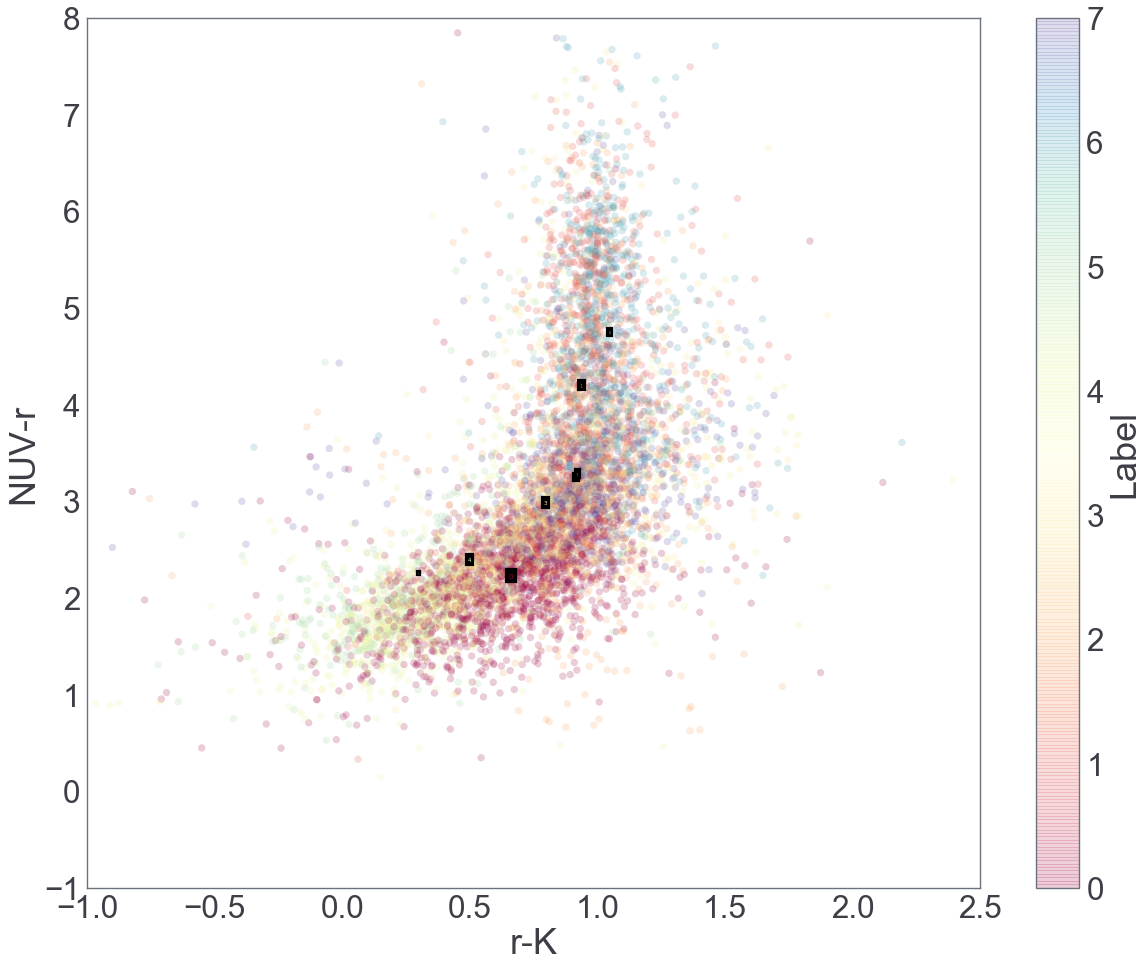

In [23]:
# Show the color-color plot with labels (each number on the plot shows the label number)

plt.figure(figsize=(20, 16))
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=(N_COMP-1))
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])

for i in tnrange(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i, 'NUV-R'])
    print('label:%s, center_point=(%s, %s)'%(i, x_mean, y_mean))
    print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])))
    plt.text(x_mean, y_mean, '$%s$'%(i), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[DATA_GAMA_FLUX['label'] == i])/200, color=plt.cm.Spectral(i/(N_COMP-1)))
    

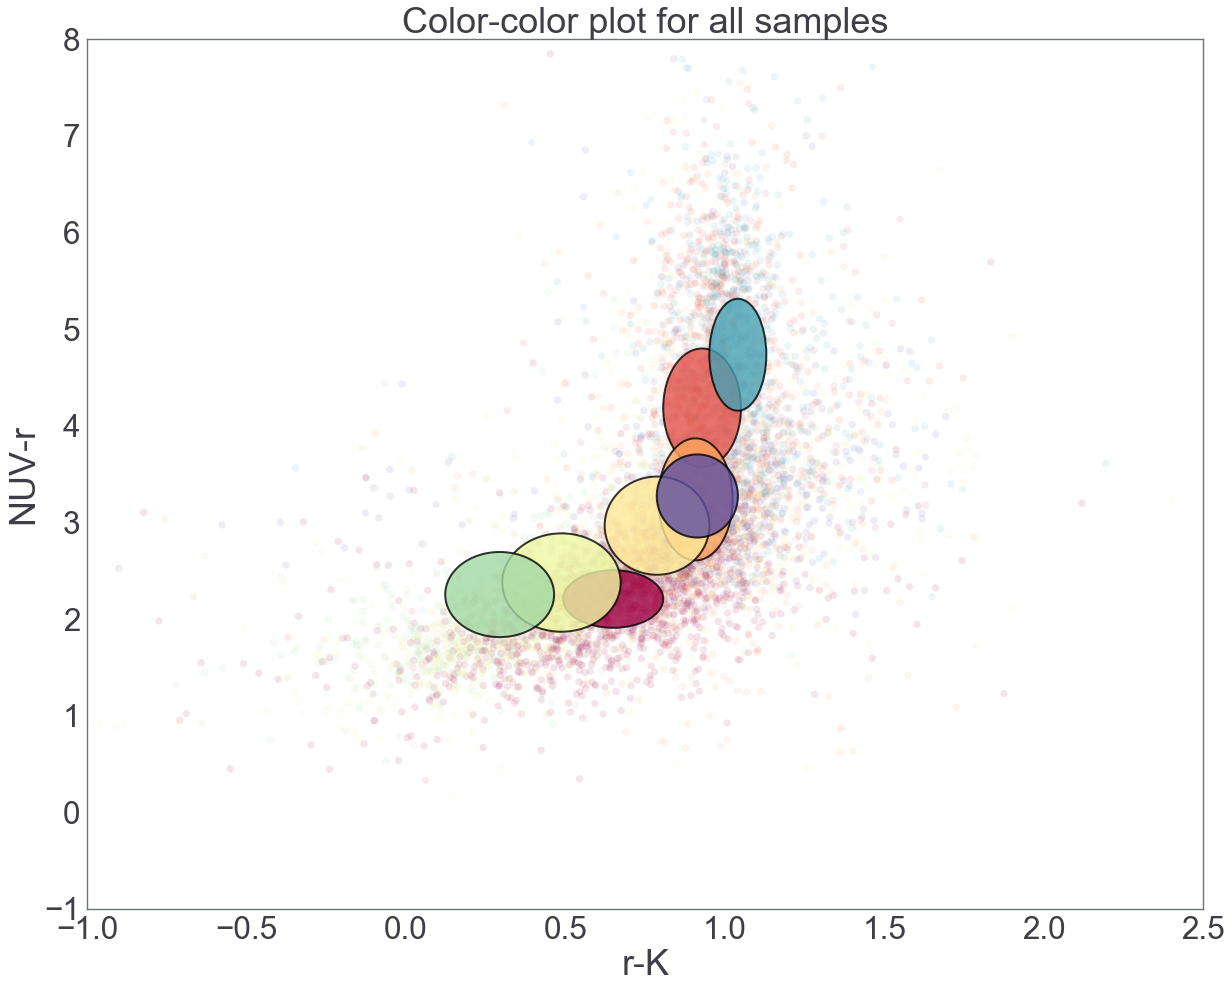

In [24]:
# Show the color-color plot with labels (each number on the plot shows the label number)

f = plt.figure(figsize=(20, 16))
ax = f.add_subplot(111)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.8, angle = 0, 
                        facecolor =plt.cm.Spectral(j/(N_COMP-1)), edgecolor='black', lw = 2)
        ax.add_patch(e1)

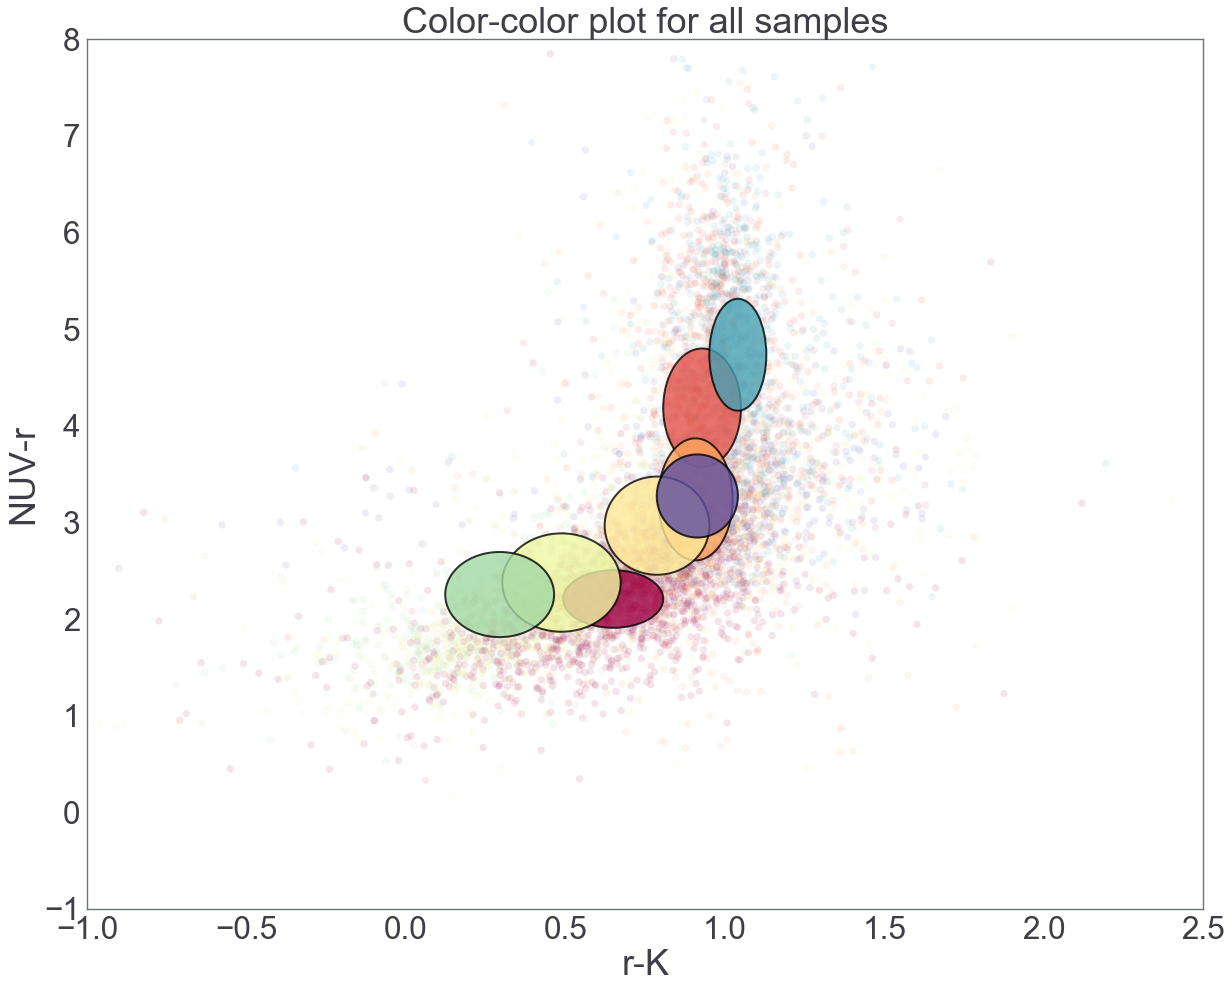

In [25]:
# Show the color-color plot with labels (each number on the plot shows the label number)

f = plt.figure(figsize=(20, 16))
ax = f.add_subplot(111)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.8, angle = 0, 
                        facecolor =plt.cm.Spectral(j/(N_COMP-1)), edgecolor='black', lw = 2)
        ax.add_patch(e1)

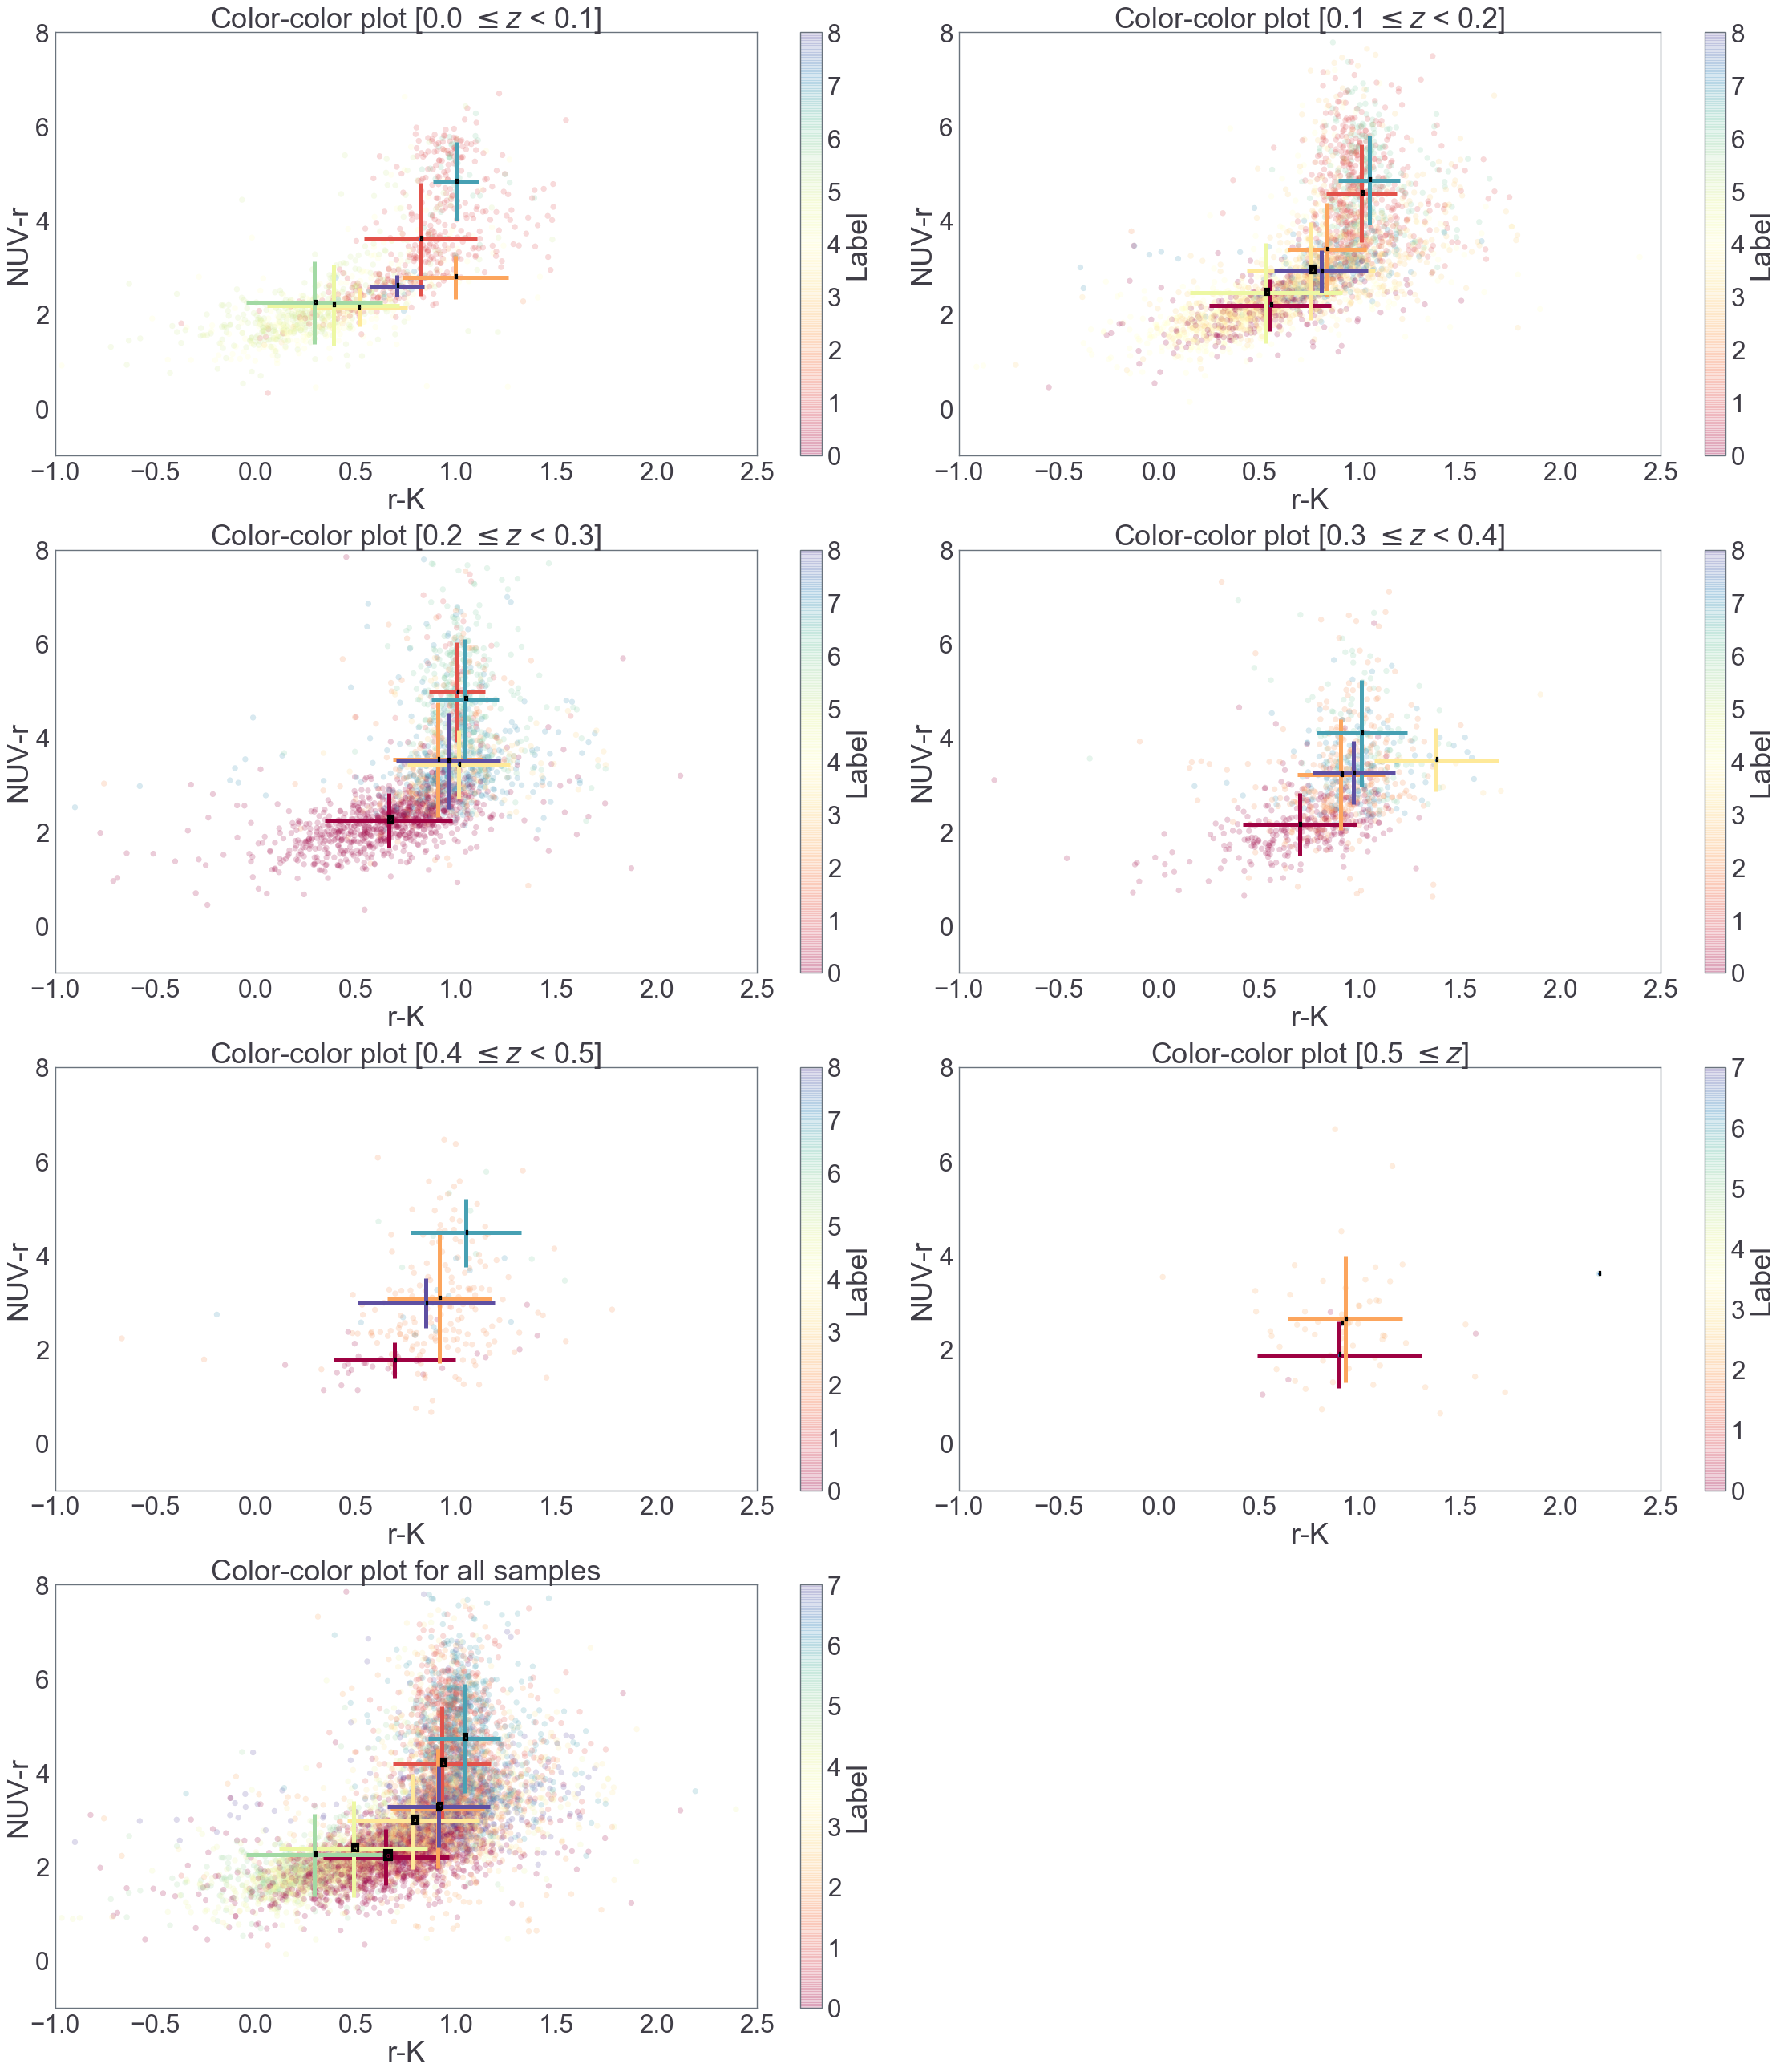

In [28]:
#  Color-color plot with colorbars based on redshift
plt.figure(figsize=(32, 36))
for i in tnrange(6):
    if i <= 4:
        plt.subplot(421 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i) & (DATA_GAMA_FLUX['Z_TONRY'] < (0.1 * i) + 0.1)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=N_COMP)
        plt.xlabel('r-K')
        plt.xlim([-1, 2.5])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$ < %s]'%('{:.1f}'.format((0.1 * i)), '{:.1f}'.format((0.1 * i) + 0.1)))
        for j in range(N_COMP):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
    else:
        plt.subplot(421 + i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        plt.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        cbar = plt.colorbar()  
        cbar.set_label('Label')
        plt.clim(vmin=0, vmax=(N_COMP-1))
        plt.xlabel('r-K')
        plt.xlim([-1, 2.5])
        plt.ylabel('NUV-r')
        plt.ylim([-1, 8])
        plt.title(r'Color-color plot [%s $\leq z$]'%('{:.1f}'.format(0.1 * i)))
        for j in range(N_COMP):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
                plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
plt.subplot(427)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax= (N_COMP-1))
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])
plt.title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
    #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
    if not np.isnan(x_mean):
        plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5, ecolor=plt.cm.Spectral(j/(N_COMP-1)))
plt.tight_layout()

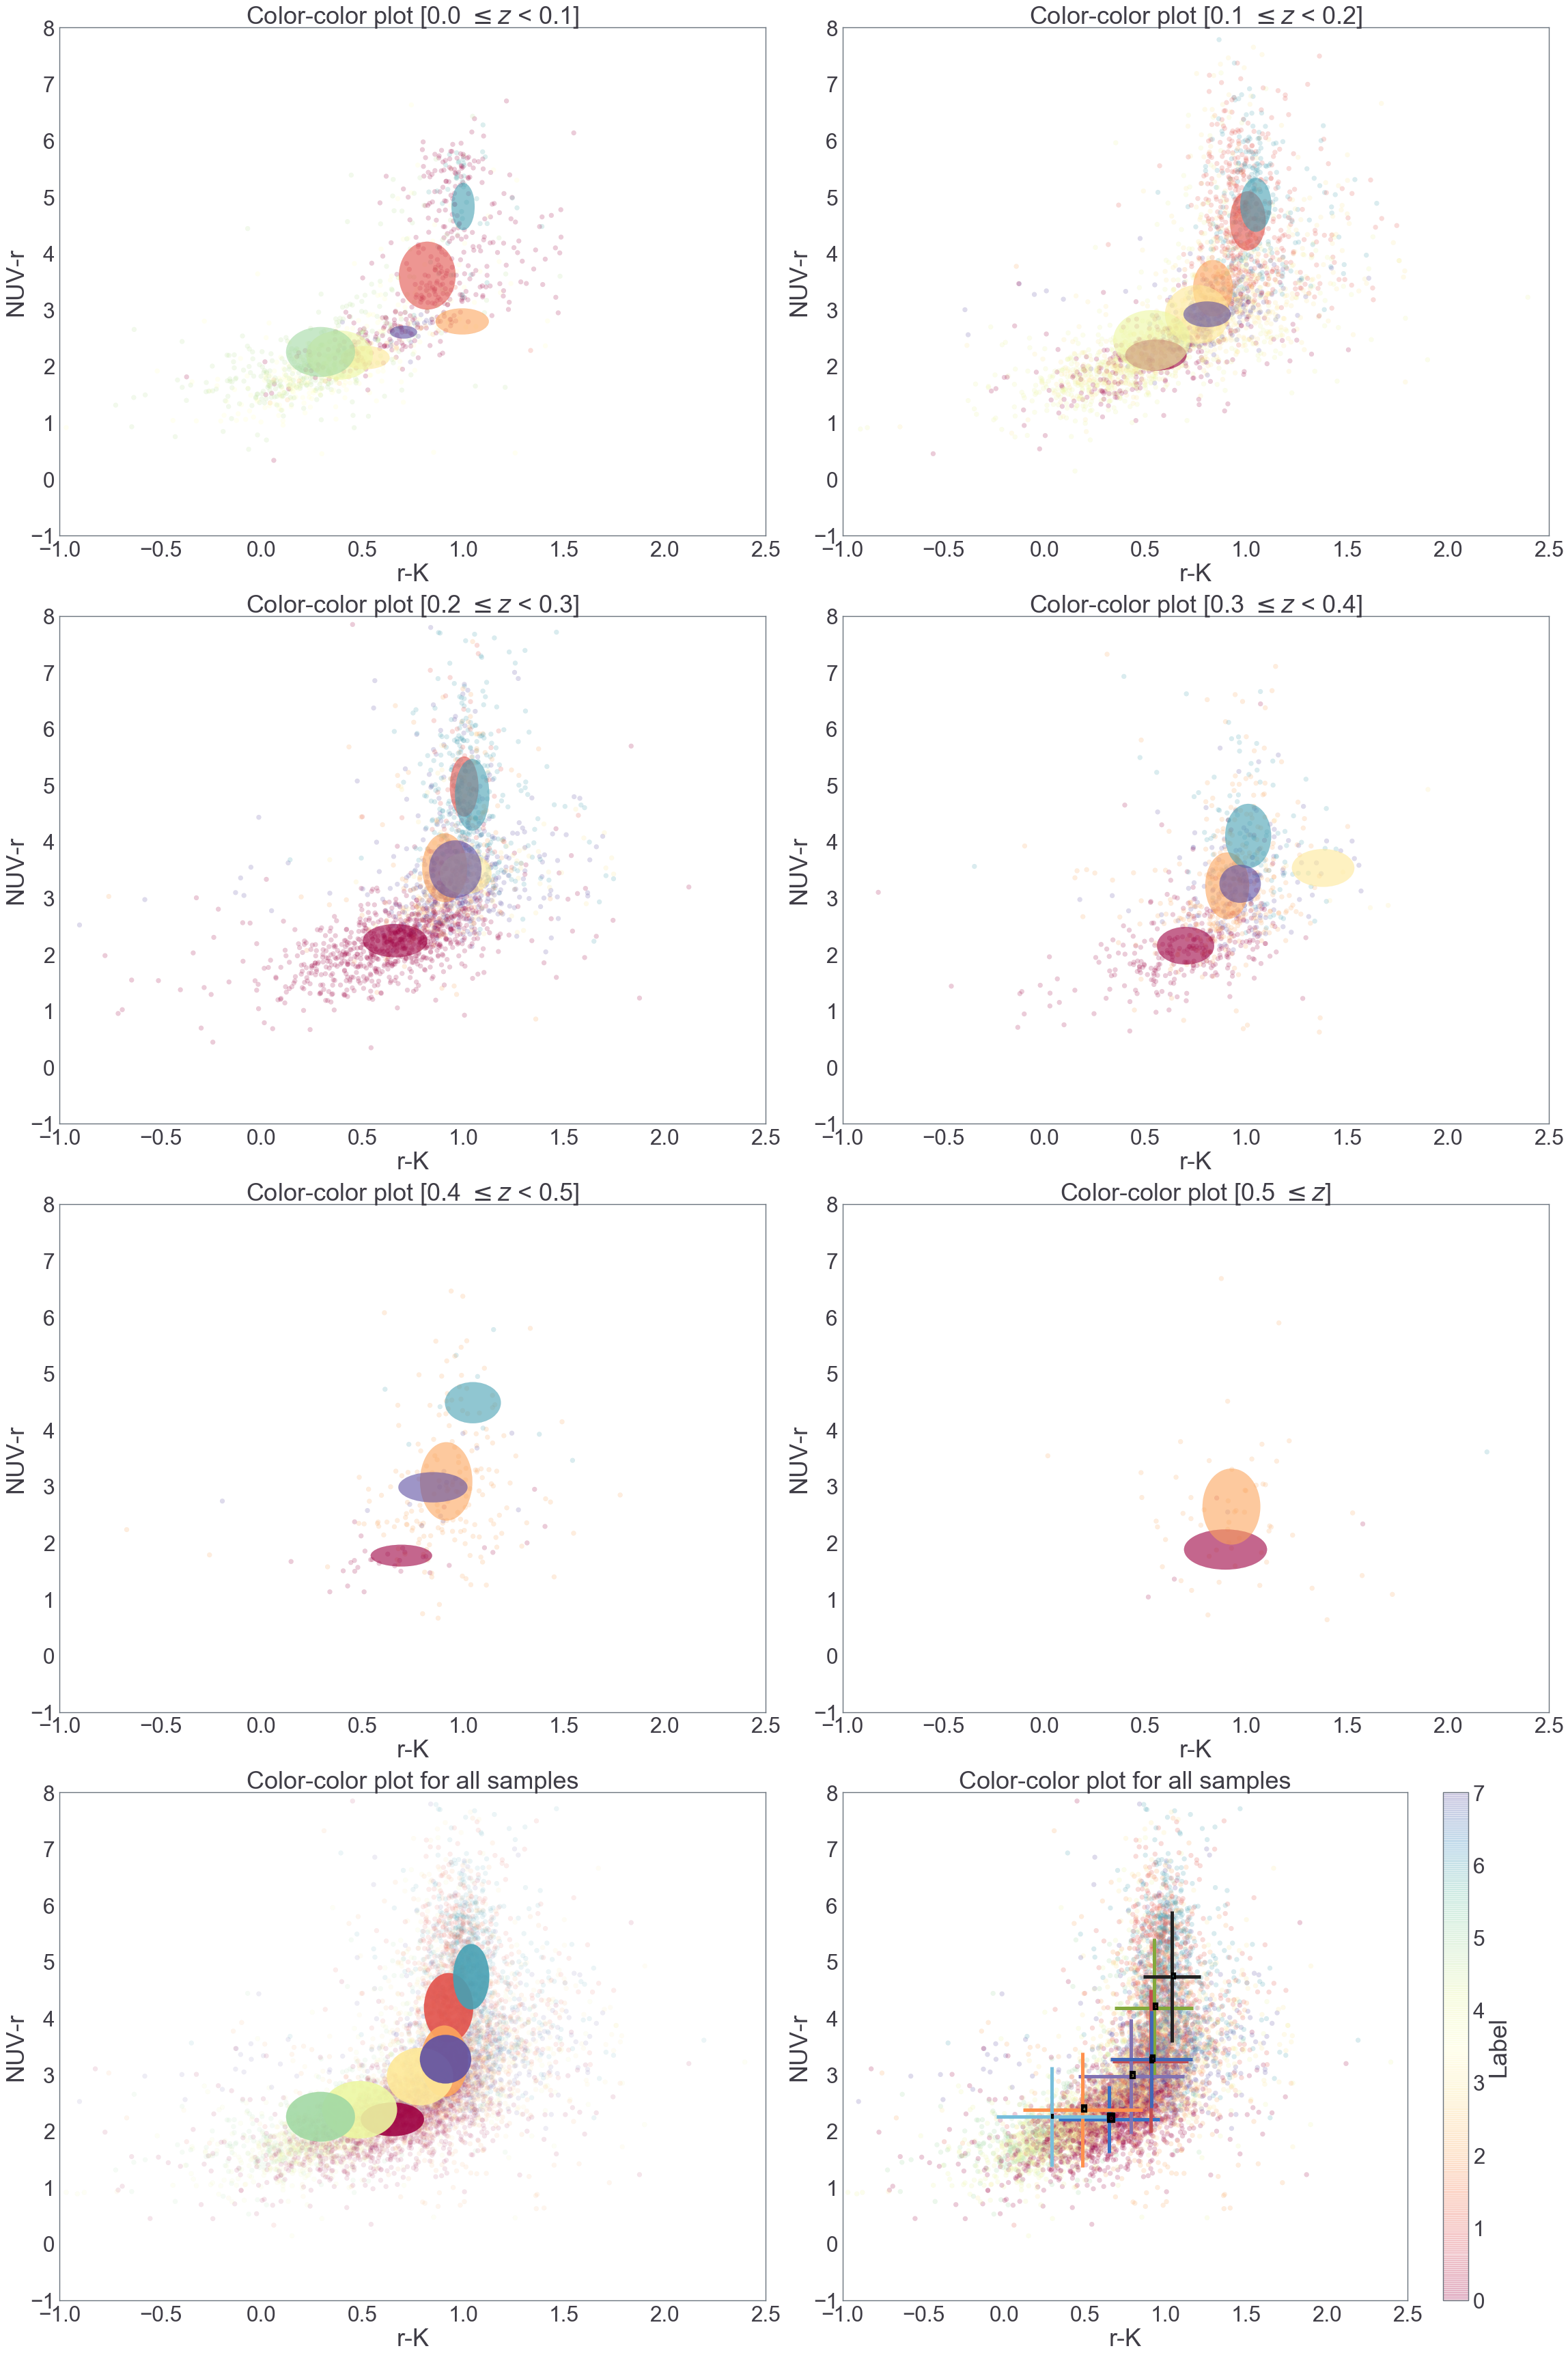

In [27]:
#  Color-color plot with colorbars based on redshift
fig = plt.figure(figsize=(32, 48))
for i in tnrange(6):
    if i <= 4:
        ax = fig.add_subplot(421+i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i) & (DATA_GAMA_FLUX['Z_TONRY'] < (0.1 * i) + 0.1)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        ax.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        ax.set_xlabel('r-K')
        ax.set_xlim([-1, 2.5])
        ax.set_ylabel('NUV-r')
        ax.set_ylim([-1, 8])
        ax.set_title(r'Color-color plot [%s $\leq z$ < %s]'%('{:.1f}'.format((0.1 * i)), '{:.1f}'.format((0.1 * i) + 0.1)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.6, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
                ax.add_patch(e1)
    else:
        ax = fig.add_subplot(421+i)
        z_range = (DATA_GAMA_FLUX['Z_TONRY'] >= 0.1 * i)
        x = DATA_GAMA_FLUX['R-K'].loc[z_range]
        y = DATA_GAMA_FLUX['NUV-R'].loc[z_range]
        c_z = DATA_GAMA_FLUX['label'].loc[z_range]
        ax.scatter(x, y, c=c_z, alpha=0.2, cmap=plt.cm.Spectral)
        ax.set_xlabel('r-K')
        ax.set_xlim([-1, 2.5])
        ax.set_ylabel('NUV-r')
        ax.set_ylim([-1, 8])
        ax.set_title(r'Color-color plot [%s $\leq z$]'%('{:.1f}'.format(0.1 * i)))
        for j in range(15):
            x_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            x_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'R-K'])
            y_mean = np.mean(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            y_std = np.std(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
            #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
            #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
            if not np.isnan(x_mean):
                e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.6, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
                ax.add_patch(e1)

ax = fig.add_subplot(427)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
ax.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.1, cmap=plt.cm.Spectral)
ax.set_xlabel('r-K')
ax.set_xlim([-1, 2.5])
ax.set_ylabel('NUV-r')
ax.set_ylim([-1, 8])
ax.set_title('Color-color plot for all samples')
for j in range(N_COMP):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    if not np.isnan(x_mean):
        e1 =pat.Ellipse(xy = (x_mean, y_mean), width = x_std, height = y_std, alpha = 0.9, angle = 0, color =plt.cm.Spectral(j/(N_COMP-1)))
        ax.add_patch(e1)
        
plt.subplot(428)
x = DATA_GAMA_FLUX['R-K']
y = DATA_GAMA_FLUX['NUV-R']
plt.scatter(x, y, c=DATA_GAMA_FLUX['label'], alpha=0.2, cmap=plt.cm.Spectral)
cbar = plt.colorbar()  
cbar.set_label('Label')
plt.clim(vmin=0, vmax=N_COMP-1)
plt.xlabel('r-K')
plt.xlim([-1, 2.5])
plt.ylabel('NUV-r')
plt.ylim([-1, 8])
plt.title('Color-color plot for all samples')
for j in range(15):
    x_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    x_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'R-K'])
    y_mean = np.mean(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    y_std = np.std(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j), 'NUV-R'])
    #print('label:%s, center_point=(%s, %s)'%(j, x_mean, y_mean))
    #print('# of samples : %s'%(len(DATA_GAMA_FLUX.loc[z_range & (DATA_GAMA_FLUX['label'] == j)])))
    if not np.isnan(x_mean):
        plt.text(x_mean, y_mean, '$%s$'%(j), fontweight='heavy', backgroundcolor='black', fontsize=len(DATA_GAMA_FLUX.loc[(DATA_GAMA_FLUX['label'] == j)])/200, color=plt.cm.Spectral(j/(N_COMP-1)))
        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='.', lw=5)
plt.tight_layout()